### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
df = pd.read_csv('data/coupons.csv')

In [3]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [4]:
df.tail(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12677,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,1
12678,Home,Partner,Sunny,30,10PM,Restaurant(<20),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,1,0,0
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0
12683,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [5]:
df.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

In [6]:
df["coupon"].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

In [7]:
df["age"].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

In [8]:
df["gender"].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [9]:
df["CarryAway"].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

In [10]:
df.isna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        destination  passanger  weather  temperature   time  coupon  \
0            False      False    False        False  False   False   
1            False      False    False        False  False   False   
2            False      False    False        False  False   False   
3            False      False    False        False  False   False   
4            False      False    False        False  False   False   
...            ...        ...      ...          ...    ...     ...   
12679        False      False    False        False  False   False   
12680        False      False    False        False  False   False   
12681        False      False    False        False  False   False   
12682        False      False    False        False  False   False   
12683        False      False    False        False  False   False   

       expiration  gender    age  maritalStatus  ...  CoffeeHouse  CarryAway  \
0           False

4. What proportion of the total observations chose to accept the coupon? 



In [11]:
accept = df['Y'].sum()/df.shape[0]
print('Proportion of total drivers choosing to accept is ', np.around(accept,4))

Proportion of total drivers choosing to accept is  0.5684


5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot: >

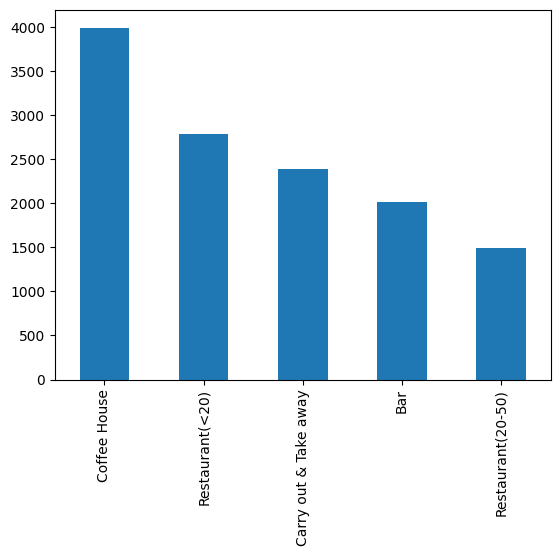

In [12]:
df['coupon'].value_counts().plot(kind='bar')

6. Use a histogram to visualize the temperature column.

<AxesSubplot: ylabel='Frequency'>

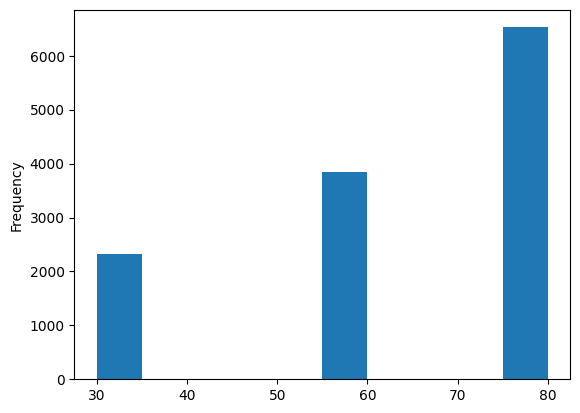

In [13]:
df['temperature'].plot(kind='hist')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [19]:
bar_df=df[df['coupon']=='Bar']
bar_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [31]:
accepted_bar = bar_df['Y'].value_counts(normalize=True) * 100
print(accepted_bar)

0    58.998513
1    41.001487
Name: Y, dtype: float64


41% of bar coupons were accepted

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [48]:
three_or_less_group = bar_df['Bar'].isin(['never','less1','1~3'])
more_than_three_group = bar_df['Bar'].isin(['4~8','gt8'])

perc_three_or_less = (bar_df.loc[three_or_less_group]['Y'].sum()/bar_df.loc[three_or_less_group].shape[0]) * 100
perc_more_than_three = (bar_df.loc[more_than_three_group]['Y'].sum()/bar_df.loc[more_than_three_group].shape[0]) * 100

print('Acceptance rate for those who went to bar 3 or fewer times a month is ',(perc_three_or_less))
print('Acceptance rate for those who went to bar greater than 3 times a month is ', (perc_more_than_three))

Acceptance rate for those who went to bar 3 or fewer times a month is  37.061769616026716
Acceptance rate for those who went to bar greater than 3 times a month is  76.88442211055276


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [51]:
#see spread and also help call out row names
bar_df['age'].value_counts()

21         417
26         395
31         339
50plus     283
36         209
41         178
46         109
below21     87
Name: age, dtype: int64

In [56]:
bar_more_once_month = bar_df['Bar'].isin(['gt8','4~8','1~3'])
age_over_25 = bar_df['age'].isin(['26','31','36','41','46','50plus'])

bar_over25_accept = (bar_df.loc[bar_more_once_month & age_over_25]['Y'].sum()/bar_df.loc[bar_more_once_month & age_over_25].shape[0]) * 100
prop_bar_all_others_accept = (bar_df.loc[~(bar_more_once_month & age_over_25)] ['Y'].sum()/bar_df.loc[~(bar_more_once_month & age_over_25)].shape[0]) * 100                                                  

print('Acceptance rate for drivers who go to bar more than once a month AND are over the age of 25 is ',(bar_over25_accept))
print('Acceptance rate for all others is ', (prop_bar_all_others_accept))

Acceptance rate for drivers who go to bar more than once a month AND are over the age of 25 is  69.52380952380952
Acceptance rate for all others is  33.500313087038194


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [75]:
passenger_not_kid = bar_df['passanger']!= 'Kid(s)'
occupation_not_FFF = bar_df['occupation']!= 'Farming Fishing & Forestry'

no_kid_no_FFF_accept = bar_df.loc[bar_more_once_month & passenger_not_kid & occupation_not_FFF]['Y'].sum()/bar_df.loc[bar_more_once_month & passenger_not_kid & occupation_not_FFF].shape[0]
print('Acceptance rate for drivers who go to bars more than once a month AND had passengers that were not a kid AND\n had occupations other than farming, fishing or forestry, is ',no_kid_no_FFF_accept)

bar_others_accept = bar_df.loc[~(bar_more_once_month & passenger_not_kid & occupation_not_FFF)]['Y'].sum()/bar_df.loc[~(bar_more_once_month & passenger_not_kid & occupation_not_FFF)].shape[0]
print('Acceptance rate for all others is ',bar_others_accept)

Acceptance rate for drivers who go to bars more than once a month AND had passengers that were not a kid AND
 had occupations other than farming, fishing or forestry, is  0.7132486388384754
Acceptance rate for all others is  0.296043656207367


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [78]:
option2 = bar_df['Bar'].isin(['gt8', '4~8', '1~3']) & bar_df['age'].isin(['21', '26', 'below21'])
option2_answer=bar_df.loc[option2]['Y'].sum()/bar_df.loc[option2].shape[0]
print('Acceptance rate for drivers who go to bars more than once a month and are under age of 30 is ', np.around(option2_answer,3))



Acceptance rate for drivers who go to bars more than once a month and are under age of 30 is  0.722


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers most likely to accept the bar coupons
-> Go to bar more than once a month, are between ages 25 and 30, and did not have a child passenger.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Text(0, 0.5, 'Count')

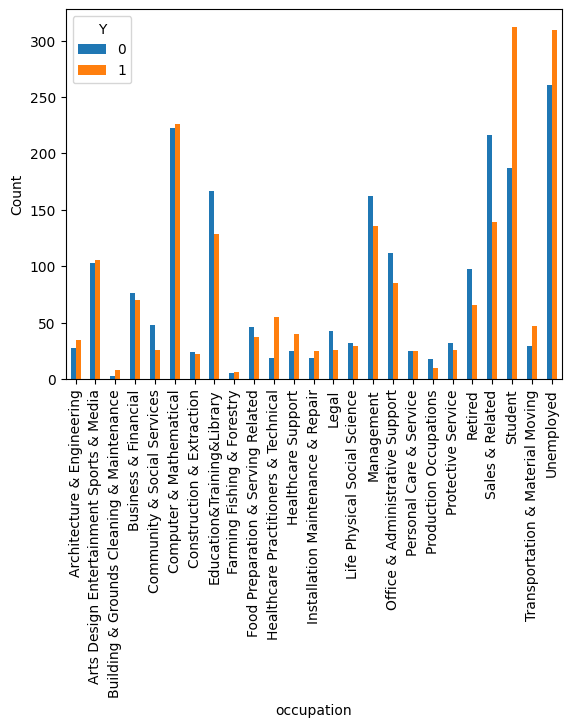

In [76]:
df_coffee=df[df['coupon']=='Coffee House']
ax=pd.crosstab(df_coffee.occupation, df_coffee.Y).plot(kind='bar')
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

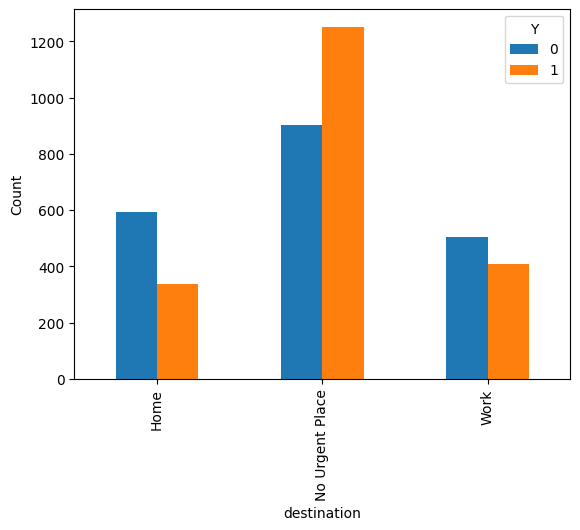

In [79]:
ax=pd.crosstab(df_coffee.destination, df_coffee.Y).plot(kind='bar')
ax.set_ylabel("Count")

Students and unemployed drivers with no urgent place to go were more likely to accept coffee shop coupons